## Imports

In [1]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

## Load and Split dataset in training and testing dataset

load the dataset but only keep the top n words, zero the rest

In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

## pad_sequences
pad_sequences is used to ensure that all sequences in a list have the same length.


    tf.keras.preprocessing.sequence.pad_sequences(
            sequences, maxlen=None, dtype='int32', padding='pre',
            truncating='pre', value=0.0
    )



This function transforms a list (of length num_samples) of 
**sequences** (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps). 
num_timesteps is either the **maxlen** argument if provided, or the length of the longest sequence in the list.

Sequences that are shorter than num_timesteps are padded with value until they are num_timesteps long.

Sequences longer than num_timesteps are truncated so that they fit the desired length.

The position where padding or truncation happens is determined by the arguments **padding** and **truncating**, respectively. Pre-padding or removing values from the beginning of the sequence is the default.

In [3]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

## Design MLP Model

### Sequential model

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

**add method:** Sequential.add(layer). Adds a layer instance on top of the layer stack.

In [4]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 250)               4000250   
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                                 
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________


## Fit the Model

In [5]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)

Epoch 1/2
196/196 - 20s - loss: 0.5801 - accuracy: 0.6506 - val_loss: 0.3155 - val_accuracy: 0.8657 - 20s/epoch - 103ms/step
Epoch 2/2
196/196 - 19s - loss: 0.2233 - accuracy: 0.9126 - val_loss: 0.3114 - val_accuracy: 0.8674 - 19s/epoch - 95ms/step


## Predict The Model

In [6]:
predict = model.predict(X_test)

In [7]:
predict

array([[0.31302392],
       [0.9965226 ],
       [0.5378991 ],
       ...,
       [0.2789628 ],
       [0.12609693],
       [0.56096053]], dtype=float32)

In [8]:
import numpy as np
rounded = [float(np.round(x)) for x in predict]
rounded

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0

## Confusion Matrix

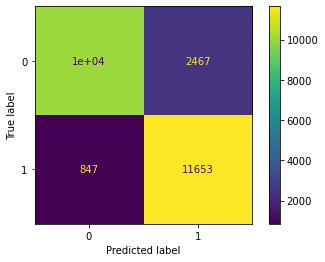

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, rounded)

## Evaluation of Model

Returns the loss value & metrics values for the model in test mode.

In [10]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)

## Accuracy

In [11]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.74%
